In [1]:
import pandas as pd
import numpy as np

In [6]:
egg_price_path = '/content/drive/MyDrive/Egg_dataset_1982_to_2025_India.csv'
df = pd.read_csv(egg_price_path)

In [7]:
df.head()

,Date,Year,Decade,Era,Month,Day,Month_Name,Day_Name,Day_of_Year,Week_of_Year,...,Price_Per_Dozen_INR,Price_Per_Tray_30_INR,Price_Per_100_Eggs_INR,Price_Per_Peti_210_INR,Price_Change_INR,Price_Change_Percent,Is_Weekend,Is_Month_End,Is_Month_Start,Source
0,14-05-1982,1982,1980,NECC_Early_Years,5,14,May,Friday,134,19,...,4.80,12.0,40.12,84.0,NaN,NaN,False,False,False,Historical_Complete_1982
1,15-05-1982,1982,1980,NECC_Early_Years,5,15,May,Saturday,135,19,...,5.04,12.6,42.13,88.2,2.01,4.77,True,False,False,Historical_Complete_1982
2,16-05-1982,1982,1980,NECC_Early_Years,5,16,May,Sunday,136,19,...,5.16,12.9,43.31,90.3,1.18,2.72,True,False,False,Historical_Complete_1982
3,17-05-1982,1982,1980,NECC_Early_Years,5,17,May,Monday,137,20,...,5.64,14.1,46.91,98.7,3.60,7.67,False,False,False,Historical_Complete_1982
4,18-05-1982,1982,1980,NECC_Early_Years,5,18,May,Tuesday,138,20,...,5.04,12.6,41.84,88.2,-5.07,-12.12,False,False,False,Historical_Complete_1982


In [9]:
print(df.head())
print(df.info())

         Date  Year  Decade               Era  Month  Day Month_Name  \
0  14-05-1982  1982    1980  NECC_Early_Years      5   14        May   
1  15-05-1982  1982    1980  NECC_Early_Years      5   15        May   
2  16-05-1982  1982    1980  NECC_Early_Years      5   16        May   
3  17-05-1982  1982    1980  NECC_Early_Years      5   17        May   
4  18-05-1982  1982    1980  NECC_Early_Years      5   18        May   

   Day_Name  Day_of_Year  Week_of_Year  ...  Price_Per_Dozen_INR  \
0    Friday          134            19  ...                 4.80   
1  Saturday          135            19  ...                 5.04   
2    Sunday          136            19  ...                 5.16   
3    Monday          137            20  ...                 5.64   
4   Tuesday          138            20  ...                 5.04   

  Price_Per_Tray_30_INR Price_Per_100_Eggs_INR  Price_Per_Peti_210_INR  \
0                  12.0                  40.12                    84.0   
1         

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

specified_cities = ['Chennai', 'Bengaluru', 'Delhi', 'Hyderabad', 'Kolkata', 'Pune', 'Mumbai', 'Ahmedabad']
df_filtered = df[df['Location'].isin(specified_cities)].copy()

start_date = '2017-05-01'
end_date = '2024-05-31'
df_filtered = df_filtered[(df_filtered['Date'] >= start_date) & (df_filtered['Date'] <= end_date)].copy()

monthly_avg_price = df_filtered.groupby(['Year', 'Month', 'Location'])['Price_Per_Egg_INR'].mean().reset_index()
monthly_avg_price = monthly_avg_price.rename(columns={'Price_Per_Egg_INR': 'Average_Price_Per_Egg_INR_Monthly'})

display(monthly_avg_price)

,Year,Month,Location,Average_Price_Per_Egg_INR_Monthly
0,2017,5,Ahmedabad,2.955484
1,2017,5,Bengaluru,2.982581
2,2017,5,Chennai,3.158065
3,2017,5,Delhi,3.090645
4,2017,5,Hyderabad,2.832258
...,...,...,...,...
675,2024,5,Delhi,4.917419
676,2024,5,Hyderabad,4.488065
677,2024,5,Kolkata,5.501935
678,2024,5,Mumbai,5.612903


In [12]:
df_monthly_avg = monthly_avg_price.copy()

print("Descriptive Statistics:")
display(df_monthly_avg.describe())

print("\nMissing Values:")
display(df_monthly_avg.isnull().sum())

print("\nDataFrame Info:")
display(df_monthly_avg.info())

Descriptive Statistics:


,Year,Month,Average_Price_Per_Egg_INR_Monthly
count,680.000000,680.000000,680.000000
mean,2020.376471,6.482353,4.408762
std,2.082122,3.438024,0.804052
min,2017.000000,1.000000,2.832258
25%,2019.000000,4.000000,3.762194
50%,2020.000000,6.000000,4.282414
75%,2022.000000,9.000000,5.047097
max,2024.000000,12.000000,6.533226



Missing Values:


,0
Year,0
Month,0
Location,0
Average_Price_Per_Egg_INR_Monthly,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               680 non-null    int64  
 1   Month                              680 non-null    int64  
 2   Location                           680 non-null    object 
 3   Average_Price_Per_Egg_INR_Monthly  680 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 21.4+ KB


None

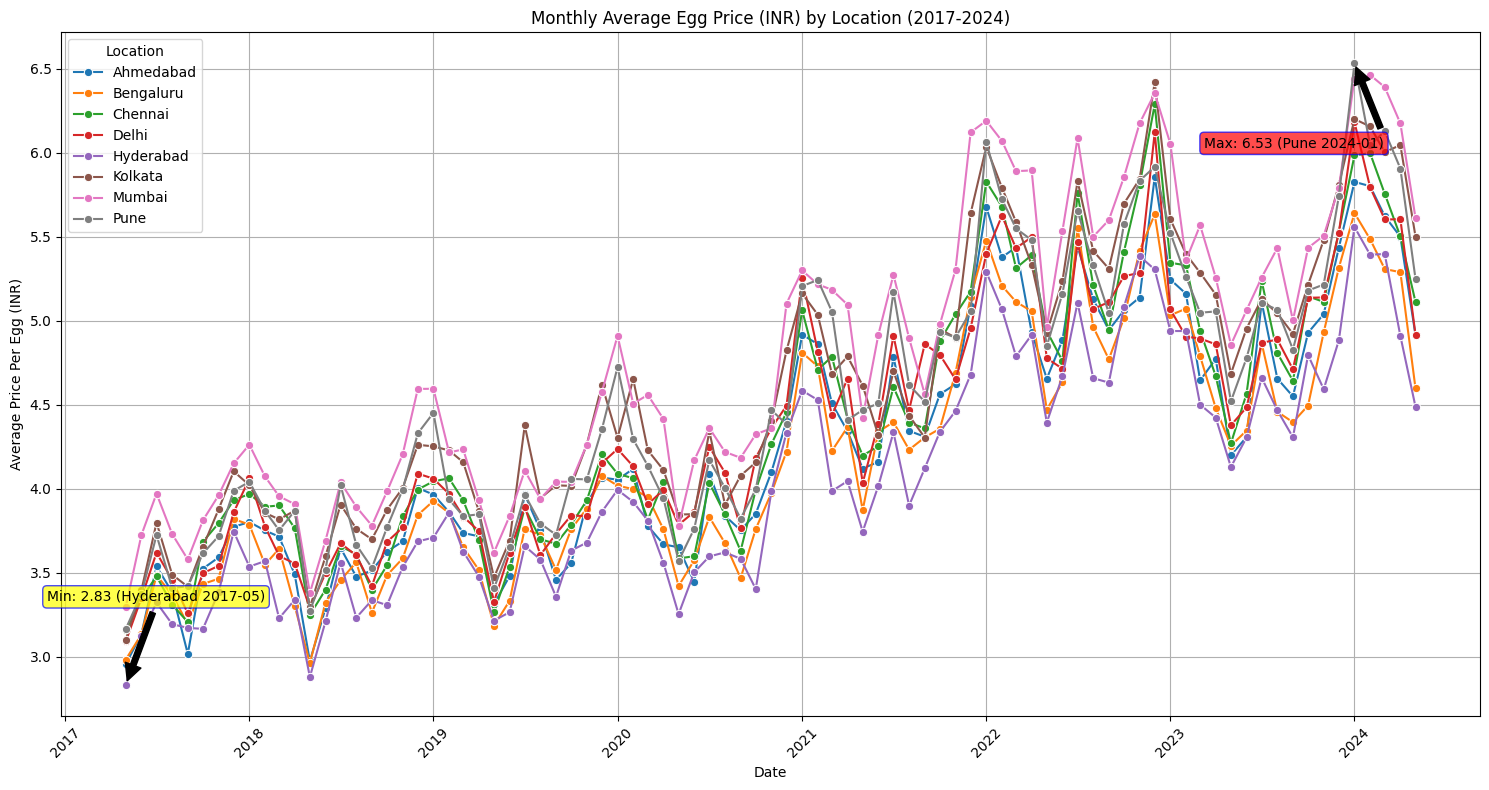

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine Year and Month into a single datetime object for plotting
df_monthly_avg['Date'] = pd.to_datetime(df_monthly_avg['Year'].astype(str) + '-' + df_monthly_avg['Month'].astype(str) + '-01')

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_monthly_avg, x='Date', y='Average_Price_Per_Egg_INR_Monthly', hue='Location', marker='o')
plt.title('Monthly Average Egg Price (INR) by Location (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Average Price Per Egg (INR)')
plt.grid(True)
plt.xticks(rotation=45)

# Add annotations for overall min and max prices
min_price_row = df_monthly_avg.loc[df_monthly_avg['Average_Price_Per_Egg_INR_Monthly'].idxmin()]
max_price_row = df_monthly_avg.loc[df_monthly_avg['Average_Price_Per_Egg_INR_Monthly'].idxmax()]

# Annotate minimum price
plt.annotate(
    f"Min: {min_price_row['Average_Price_Per_Egg_INR_Monthly']:.2f} ({min_price_row['Location']} {min_price_row['Date'].strftime('%Y-%m')})",
    xy=(min_price_row['Date'], min_price_row['Average_Price_Per_Egg_INR_Monthly']),
    xytext=(min_price_row['Date'] + pd.Timedelta(days=60), min_price_row['Average_Price_Per_Egg_INR_Monthly'] + 0.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=1, alpha=0.7)
)

# Annotate maximum price
plt.annotate(
    f"Max: {max_price_row['Average_Price_Per_Egg_INR_Monthly']:.2f} ({max_price_row['Location']} {max_price_row['Date'].strftime('%Y-%m')})",
    xy=(max_price_row['Date'], max_price_row['Average_Price_Per_Egg_INR_Monthly']),
    xytext=(max_price_row['Date'] - pd.Timedelta(days=120), max_price_row['Average_Price_Per_Egg_INR_Monthly'] - 0.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="red", ec="b", lw=1, alpha=0.7)
)

plt.tight_layout()
plt.show()

In [17]:
monthly_price_volatility = df_filtered.groupby(['Year', 'Month', 'Location'])['Price_Per_Egg_INR'].std().reset_index()
monthly_price_volatility = monthly_price_volatility.rename(columns={'Price_Per_Egg_INR': 'Monthly_Price_Volatility'})

display(monthly_price_volatility)

,Year,Month,Location,Monthly_Price_Volatility
0,2017,5,Ahmedabad,0.337805
1,2017,5,Bengaluru,0.377120
2,2017,5,Chennai,0.392500
3,2017,5,Delhi,0.385460
4,2017,5,Hyderabad,0.353475
...,...,...,...,...
675,2024,5,Delhi,0.639880
676,2024,5,Hyderabad,0.547938
677,2024,5,Kolkata,0.748342
678,2024,5,Mumbai,0.804090


In [46]:
#export
df_monthly_avg.to_csv('monthly_avg_egg_price.csv', index=False)
print("DataFrame exported successfully to 'monthly_avg_egg_price.csv'")

DataFrame exported successfully to 'monthly_avg_egg_price.csv'


In [28]:
import os

# List of specified cities from previous steps, correcting 'Hyderabad' to 'Hyerabad'
specified_cities = ['Chennai', 'Bengaluru', 'Delhi', 'Hyerabad', 'Kolkata', 'Pune', 'Mumbai', 'Ahmedabad']

# Prepare a list to hold dataframes from each city
city_dfs = []

# Iterate through each city to load its corresponding CSV file
for city in specified_cities:
    file_path = f'/content/{city}.csv'
    if os.path.exists(file_path):
        try:
            df_city = pd.read_csv(file_path)
            df_city['Location'] = city  # Add a 'Location' column to identify the city
            city_dfs.append(df_city)
            print(f"Successfully loaded {city}.csv")
        except Exception as e:
            print(f"Error loading {city}.csv: {e}")
    else:
        print(f"File not found for {city}: {file_path}")

# Concatenate all city dataframes into a single dataframe
if city_dfs:
    combined_cities_df = pd.concat(city_dfs, ignore_index=True)
    print("\nCombined DataFrame head:")
    display(combined_cities_df.head())
    print("\nCombined DataFrame info:")
    display(combined_cities_df.info())
else:
    print("No city CSV files were found or loaded.")

Successfully loaded Chennai.csv
Successfully loaded Bengaluru.csv
Successfully loaded Delhi.csv
Successfully loaded Hyerabad.csv
Successfully loaded Kolkata.csv
Successfully loaded Pune.csv
Successfully loaded Mumbai.csv
Successfully loaded Ahmedabad.csv

Combined DataFrame head:


,_id,Date,Temp Max,Temp Min,Location,Rain,Rain.1,Temp Max.1,Temp Min.1,Location.1
0,1.0,01-01-1951,29.01000023,20.25,Chennai,NaN,NaN,NaN,NaN,NaN
1,2.0,02-01-1951,28.5,19.96999931,Chennai,NaN,NaN,NaN,NaN,NaN
2,3.0,03-01-1951,28.67000008,18.68000031,Chennai,NaN,NaN,NaN,NaN,NaN
3,4.0,04-01-1951,28.55999947,18.75,Chennai,NaN,NaN,NaN,NaN,NaN
4,5.0,05-01-1951,28.62000084,18.35000038,Chennai,NaN,NaN,NaN,NaN,NaN



Combined DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214491 entries, 0 to 214490
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _id         26836 non-null   float64
 1   Date        214491 non-null  object 
 2   Temp Max    214482 non-null  object 
 3   Temp Min    214476 non-null  object 
 4   Location    214491 non-null  object 
 5   Rain        162079 non-null  object 
 6   Rain.1      25568 non-null   float64
 7   Temp Max.1  25568 non-null   float64
 8   Temp Min.1  25567 non-null   float64
 9   Location.1  840 non-null     object 
dtypes: float64(4), object(6)
memory usage: 16.4+ MB


None

In [29]:
combined_cities_df.columns

Index(['_id', 'Date', 'Temp Max', 'Temp Min', 'Location', 'Rain', 'Rain.1',
       'Temp Max.1', 'Temp Min.1', 'Location.1'],
      dtype='object')

In [27]:
combined_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187688 entries, 0 to 187687
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _id         26836 non-null   float64
 1   Date        187688 non-null  object 
 2   Temp Max    187679 non-null  object 
 3   Temp Min    187673 non-null  object 
 4   Location    187688 non-null  object 
 5   Rain        135276 non-null  object 
 6   Rain.1      25568 non-null   float64
 7   Temp Max.1  25568 non-null   float64
 8   Temp Min.1  25567 non-null   float64
 9   Location.1  840 non-null     object 
dtypes: float64(4), object(6)
memory usage: 14.3+ MB


In [31]:
print("\nUnique values and counts for 'Location.1':\n")
display(combined_cities_df['Location'].value_counts(dropna=False))


Unique values and counts for 'Location.1':



,count
Location,
Chennai,26836
Bengaluru,26835
Ahmedabad,26805
Delhi,26803
Hyerabad,26803
Kolkata,26803
Pune,26803
Mumbai,26803


In [34]:
columns_to_keep = ['Date', 'Temp Max', 'Temp Min', 'Location']
combined_cities_df = combined_cities_df[columns_to_keep].copy()

print("DataFrame after keeping selected columns:")
display(combined_cities_df.head())
display(combined_cities_df.info())

DataFrame after keeping selected columns:


,Date,Temp Max,Temp Min,Location
0,01-01-1951,29.01000023,20.25,Chennai
1,02-01-1951,28.5,19.96999931,Chennai
2,03-01-1951,28.67000008,18.68000031,Chennai
3,04-01-1951,28.55999947,18.75,Chennai
4,05-01-1951,28.62000084,18.35000038,Chennai


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214491 entries, 0 to 214490
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      214491 non-null  object
 1   Temp Max  214482 non-null  object
 2   Temp Min  214476 non-null  object
 3   Location  214491 non-null  object
dtypes: object(4)
memory usage: 6.5+ MB


None

In [33]:
combined_cities_df.tail()

,Date,Temp Max,Temp Min,Location
214486,17-06-2024,40.3,30.1,Ahmedabad
214487,18-06-2024,40.6,30.7,Ahmedabad
214488,19-06-2024,41,29.6,Ahmedabad
214489,20-06-2024,38,29.7,Ahmedabad
214490,21-06-2024,41.3,30.1,Ahmedabad


In [35]:
combined_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214491 entries, 0 to 214490
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      214491 non-null  object
 1   Temp Max  214482 non-null  object
 2   Temp Min  214476 non-null  object
 3   Location  214491 non-null  object
dtypes: object(4)
memory usage: 6.5+ MB


In [37]:
# Convert 'Date' to datetime
combined_cities_df['Date'] = pd.to_datetime(combined_cities_df['Date'], format='%d-%m-%Y', errors='coerce')

# Convert 'Temp Max' and 'Temp Min' to numeric
combined_cities_df['Temp Max'] = pd.to_numeric(combined_cities_df['Temp Max'], errors='coerce')
combined_cities_df['Temp Min'] = pd.to_numeric(combined_cities_df['Temp Min'], errors='coerce')

# Convert 'Location' to string (it's likely already string, but for explicit type setting)
combined_cities_df['Location'] = combined_cities_df['Location'].astype(str)

print("DataFrame after data type conversion:")
display(combined_cities_df.head())
display(combined_cities_df.info())

DataFrame after data type conversion:


,Date,Temp Max,Temp Min,Location
0,1951-01-01,29.010000,20.250000,Chennai
1,1951-01-02,28.500000,19.969999,Chennai
2,1951-01-03,28.670000,18.680000,Chennai
3,1951-01-04,28.559999,18.750000,Chennai
4,1951-01-05,28.620001,18.350000,Chennai


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214491 entries, 0 to 214490
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      214491 non-null  datetime64[ns]
 1   Temp Max  214137 non-null  float64       
 2   Temp Min  214106 non-null  float64       
 3   Location  214491 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.5+ MB


None

In [39]:
combined_cities_df['Average_Temp_Combined'] = combined_cities_df[['Temp Max', 'Temp Min']].mean(axis=1)

print("DataFrame with new 'Average_Temp_Combined' column:")
display(combined_cities_df.head())
display(combined_cities_df.info())

DataFrame with new 'Average_Temp_Combined' column:


,Date,Temp Max,Temp Min,Location,Average_Temp_Combined
0,1951-01-01,29.010000,20.250000,Chennai,24.630000
1,1951-01-02,28.500000,19.969999,Chennai,24.235000
2,1951-01-03,28.670000,18.680000,Chennai,23.675000
3,1951-01-04,28.559999,18.750000,Chennai,23.655000
4,1951-01-05,28.620001,18.350000,Chennai,23.485001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214491 entries, 0 to 214490
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   214491 non-null  datetime64[ns]
 1   Temp Max               214137 non-null  float64       
 2   Temp Min               214106 non-null  float64       
 3   Location               214491 non-null  object        
 4   Average_Temp_Combined  214139 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 8.2+ MB


None

In [40]:
combined_cities_df.head()

,Date,Temp Max,Temp Min,Location,Average_Temp_Combined
0,1951-01-01,29.010000,20.250000,Chennai,24.630000
1,1951-01-02,28.500000,19.969999,Chennai,24.235000
2,1951-01-03,28.670000,18.680000,Chennai,23.675000
3,1951-01-04,28.559999,18.750000,Chennai,23.655000
4,1951-01-05,28.620001,18.350000,Chennai,23.485001


In [ ]:
combined_cities_df = combined_cities_df.drop(columns=['Temp Max', 'Temp Min'])

print("DataFrame after dropping 'Temp Max' and 'Temp Min' columns:")
display(combined_cities_df.head())
display(combined_cities_df.info())

In [43]:
display(combined_cities_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214491 entries, 0 to 214490
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   214491 non-null  datetime64[ns]
 1   Location               214491 non-null  object        
 2   Average_Temp_Combined  214139 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.9+ MB


None

In [44]:
start_date_filter = '2017-05-31'
end_date_filter = '2024-05-31'

combined_cities_df_filtered = combined_cities_df[(combined_cities_df['Date'] >= start_date_filter) & (combined_cities_df['Date'] <= end_date_filter)].copy()

print("DataFrame filtered by date range:")
display(combined_cities_df_filtered.head())
display(combined_cities_df_filtered.info())

DataFrame filtered by date range:


,Date,Location,Average_Temp_Combined
24257,2017-05-31,Chennai,34.220219
24258,2017-06-01,Chennai,34.079527
24259,2017-06-02,Chennai,33.823611
24260,2017-06-03,Chennai,34.450090
24261,2017-06-04,Chennai,34.529461


<class 'pandas.core.frame.DataFrame'>
Index: 20278 entries, 24257 to 214469
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   20278 non-null  datetime64[ns]
 1   Location               20278 non-null  object        
 2   Average_Temp_Combined  19926 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 633.7+ KB


None

In [45]:
combined_cities_df_filtered['Year'] = combined_cities_df_filtered['Date'].dt.year
combined_cities_df_filtered['Month'] = combined_cities_df_filtered['Date'].dt.month

monthly_avg_temp_combined = combined_cities_df_filtered.groupby(['Year', 'Month', 'Location'])['Average_Temp_Combined'].mean().reset_index()
monthly_avg_temp_combined = monthly_avg_temp_combined.rename(columns={'Average_Temp_Combined': 'Monthly_Average_Temp_Combined'})

print("Monthly Average Temperature Combined:")
display(monthly_avg_temp_combined.head())
display(monthly_avg_temp_combined.info())

Monthly Average Temperature Combined:


,Year,Month,Location,Monthly_Average_Temp_Combined
0,2017,5,Ahmedabad,33.659287
1,2017,5,Bengaluru,27.617872
2,2017,5,Chennai,34.220219
3,2017,5,Delhi,31.635918
4,2017,5,Hyerabad,33.954823


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           674 non-null    int32  
 1   Month                          674 non-null    int32  
 2   Location                       674 non-null    object 
 3   Monthly_Average_Temp_Combined  674 non-null    float64
dtypes: float64(1), int32(2), object(1)
memory usage: 15.9+ KB


None

In [47]:
monthly_avg_temp_combined = monthly_avg_temp_combined.rename(columns={'Monthly_Average_Temp_Combined': 'amonthly average temp'})

print("DataFrame after renaming column:")
display(monthly_avg_temp_combined.head())
display(monthly_avg_temp_combined.info())

DataFrame after renaming column:


,Year,Month,Location,amonthly average temp
0,2017,5,Ahmedabad,33.659287
1,2017,5,Bengaluru,27.617872
2,2017,5,Chennai,34.220219
3,2017,5,Delhi,31.635918
4,2017,5,Hyerabad,33.954823


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   674 non-null    int32  
 1   Month                  674 non-null    int32  
 2   Location               674 non-null    object 
 3   amonthly average temp  674 non-null    float64
dtypes: float64(1), int32(2), object(1)
memory usage: 15.9+ KB


None

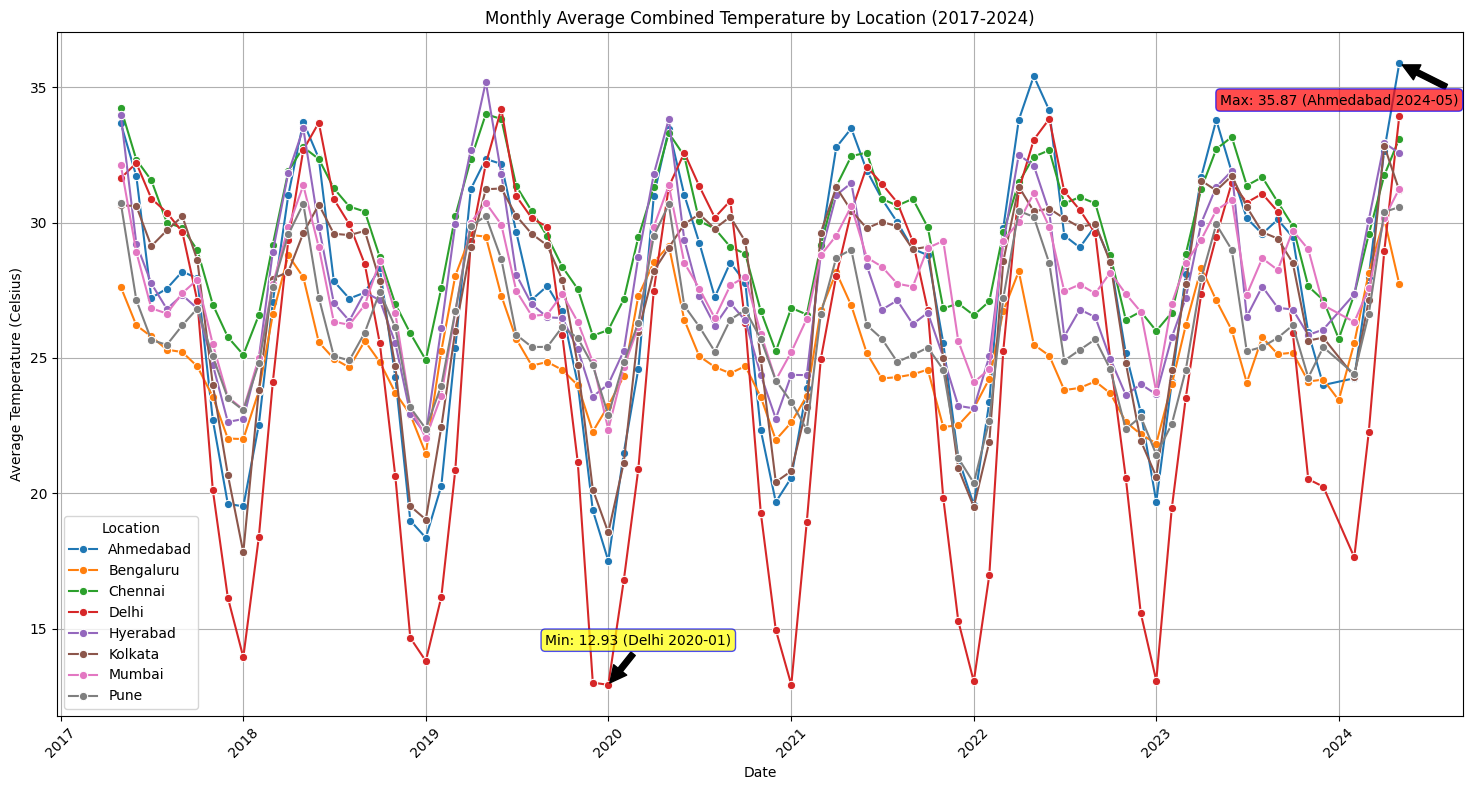

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine Year and Month into a single datetime object for plotting
monthly_avg_temp_combined['Date'] = pd.to_datetime(monthly_avg_temp_combined['Year'].astype(str) + '-' + monthly_avg_temp_combined['Month'].astype(str) + '-01')

plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_avg_temp_combined, x='Date', y='amonthly average temp', hue='Location', marker='o')
plt.title('Monthly Average Combined Temperature by Location (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (Celsius)')
plt.grid(True)
plt.xticks(rotation=45)

# Add annotations for overall min and max temperatures
min_temp_row = monthly_avg_temp_combined.loc[monthly_avg_temp_combined['amonthly average temp'].idxmin()]
max_temp_row = monthly_avg_temp_combined.loc[monthly_avg_temp_combined['amonthly average temp'].idxmax()]

# Annotate minimum temperature
plt.annotate(
    f"Min: {min_temp_row['amonthly average temp']:.2f} ({min_temp_row['Location']} {min_temp_row['Date'].strftime('%Y-%m')})",
    xy=(min_temp_row['Date'], min_temp_row['amonthly average temp']),
    xytext=(min_temp_row['Date'] + pd.Timedelta(days=60), min_temp_row['amonthly average temp'] + 1.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=1, alpha=0.7)
)

# Annotate maximum temperature
plt.annotate(
    f"Max: {max_temp_row['amonthly average temp']:.2f} ({max_temp_row['Location']} {max_temp_row['Date'].strftime('%Y-%m')})",
    xy=(max_temp_row['Date'], max_temp_row['amonthly average temp']),
    xytext=(max_temp_row['Date'] - pd.Timedelta(days=120), max_temp_row['amonthly average temp'] - 1.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="red", ec="b", lw=1, alpha=0.7)
)

plt.tight_layout()
plt.show()

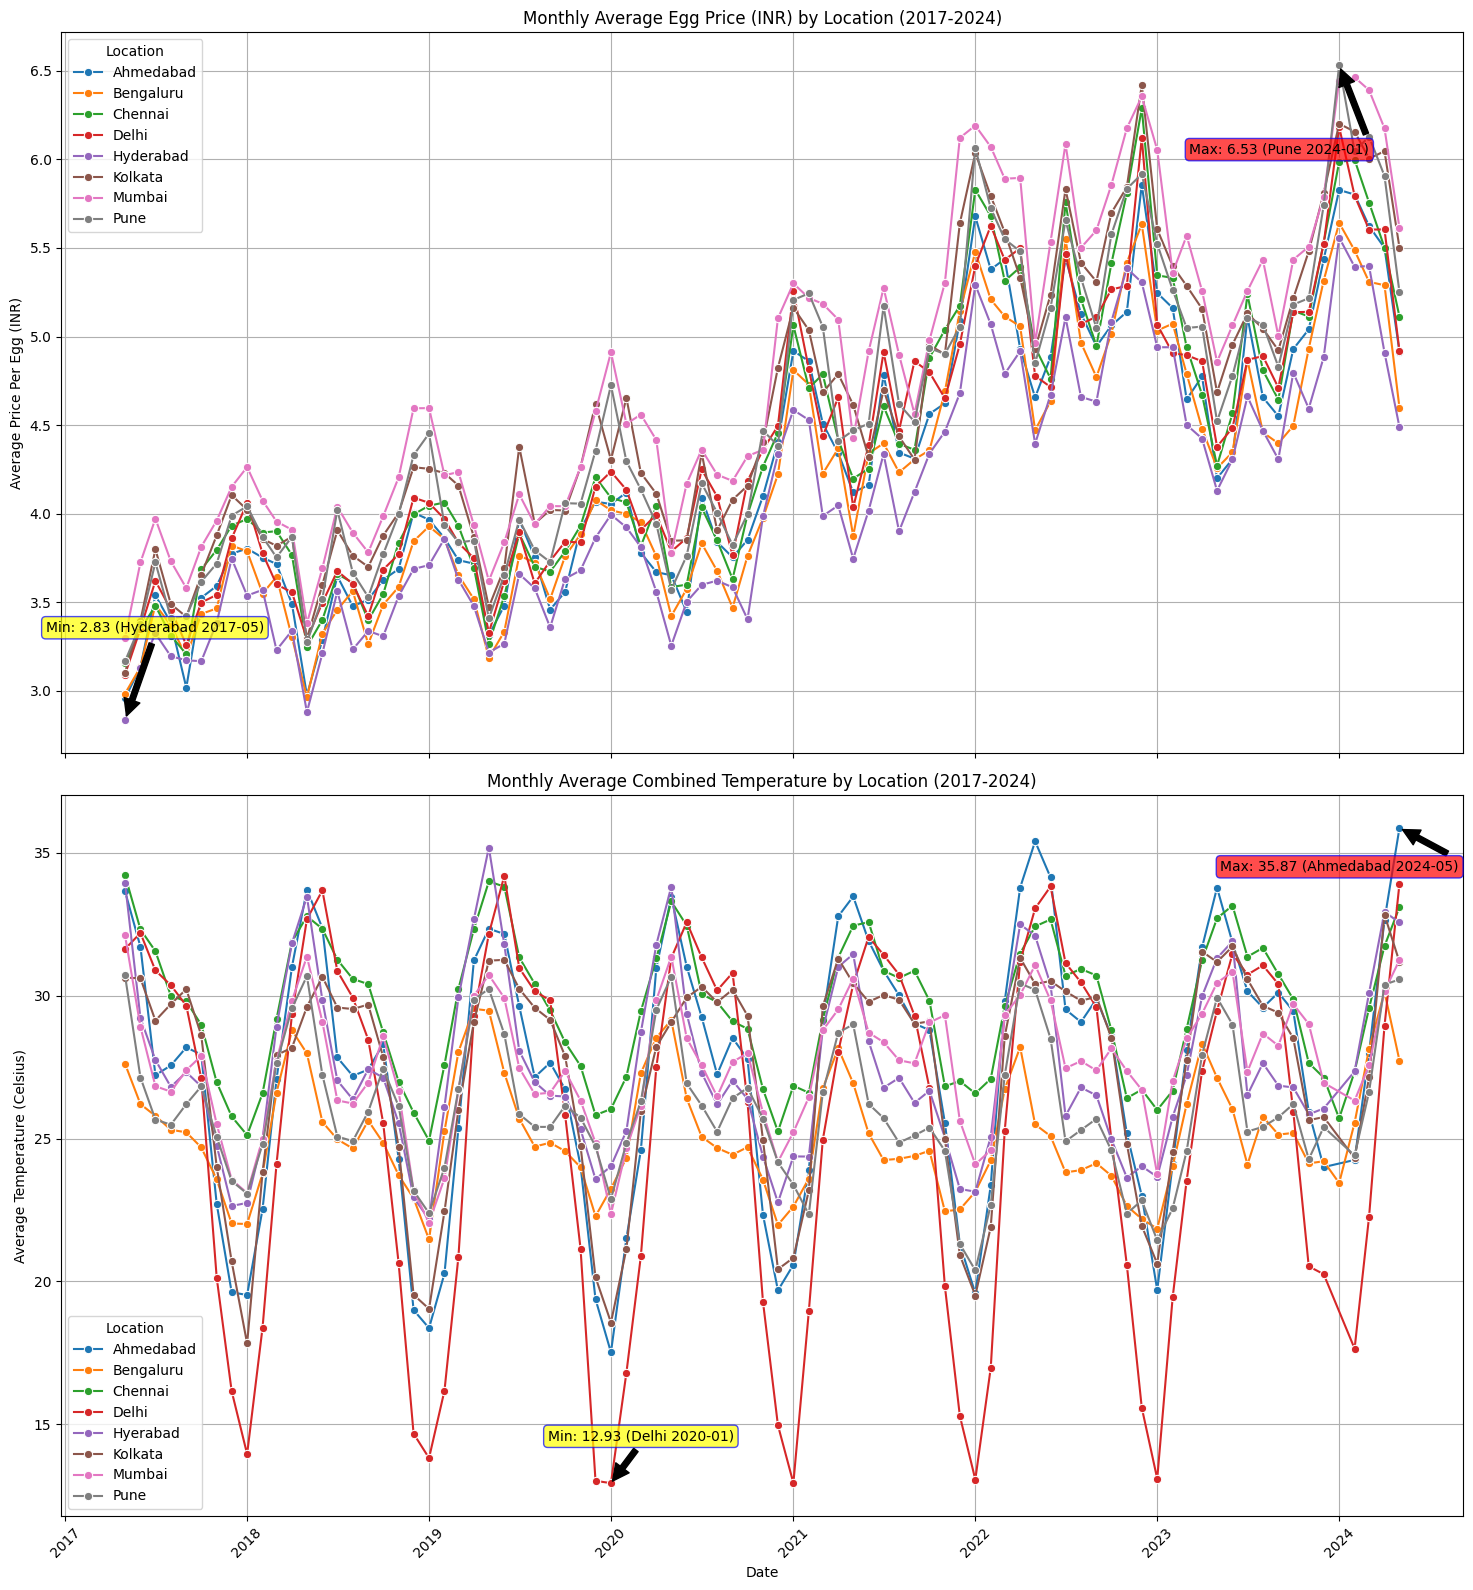

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine Year and Month into a single datetime object for plotting for both dataframes
df_monthly_avg['Date'] = pd.to_datetime(df_monthly_avg['Year'].astype(str) + '-' + df_monthly_avg['Month'].astype(str) + '-01')
monthly_avg_temp_combined['Date'] = pd.to_datetime(monthly_avg_temp_combined['Year'].astype(str) + '-' + monthly_avg_temp_combined['Month'].astype(str) + '-01')

fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharex=True)

# Plot 1: Monthly Average Egg Price
sns.lineplot(data=df_monthly_avg, x='Date', y='Average_Price_Per_Egg_INR_Monthly', hue='Location', marker='o', ax=axes[0])
axes[0].set_title('Monthly Average Egg Price (INR) by Location (2017-2024)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Price Per Egg (INR)')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Add annotations for overall min and max egg prices
min_price_row = df_monthly_avg.loc[df_monthly_avg['Average_Price_Per_Egg_INR_Monthly'].idxmin()]
max_price_row = df_monthly_avg.loc[df_monthly_avg['Average_Price_Per_Egg_INR_Monthly'].idxmax()]

axes[0].annotate(
    f"Min: {min_price_row['Average_Price_Per_Egg_INR_Monthly']:.2f} ({min_price_row['Location']} {min_price_row['Date'].strftime('%Y-%m')})",
    xy=(min_price_row['Date'], min_price_row['Average_Price_Per_Egg_INR_Monthly']),
    xytext=(min_price_row['Date'] + pd.Timedelta(days=60), min_price_row['Average_Price_Per_Egg_INR_Monthly'] + 0.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=1, alpha=0.7)
)
axes[0].annotate(
    f"Max: {max_price_row['Average_Price_Per_Egg_INR_Monthly']:.2f} ({max_price_row['Location']} {max_price_row['Date'].strftime('%Y-%m')})",
    xy=(max_price_row['Date'], max_price_row['Average_Price_Per_Egg_INR_Monthly']),
    xytext=(max_price_row['Date'] - pd.Timedelta(days=120), max_price_row['Average_Price_Per_Egg_INR_Monthly'] - 0.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="red", ec="b", lw=1, alpha=0.7)
)

# Plot 2: Monthly Average Combined Temperature
sns.lineplot(data=monthly_avg_temp_combined, x='Date', y='amonthly average temp', hue='Location', marker='o', ax=axes[1])
axes[1].set_title('Monthly Average Combined Temperature by Location (2017-2024)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Temperature (Celsius)')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# Add annotations for overall min and max temperatures
min_temp_row = monthly_avg_temp_combined.loc[monthly_avg_temp_combined['amonthly average temp'].idxmin()]
max_temp_row = monthly_avg_temp_combined.loc[monthly_avg_temp_combined['amonthly average temp'].idxmax()]

axes[1].annotate(
    f"Min: {min_temp_row['amonthly average temp']:.2f} ({min_temp_row['Location']} {min_temp_row['Date'].strftime('%Y-%m')})",
    xy=(min_temp_row['Date'], min_temp_row['amonthly average temp']),
    xytext=(min_temp_row['Date'] + pd.Timedelta(days=60), min_temp_row['amonthly average temp'] + 1.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=1, alpha=0.7)
)
axes[1].annotate(
    f"Max: {max_temp_row['amonthly average temp']:.2f} ({max_temp_row['Location']} {max_temp_row['Date'].strftime('%Y-%m')})",
    xy=(max_temp_row['Date'], max_temp_row['amonthly average temp']),
    xytext=(max_temp_row['Date'] - pd.Timedelta(days=120), max_temp_row['amonthly average temp'] - 1.5),
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center',
    bbox=dict(boxstyle="round,pad=0.3", fc="red", ec="b", lw=1, alpha=0.7)
)

plt.tight_layout()
plt.show()

Merged DataFrame head:


,Year,Month,Location,Average_Price_Per_Egg_INR_Monthly,Date_x,amonthly average temp,Date_y
0,2017,5,Ahmedabad,2.955484,2017-05-01,33.659287,2017-05-01
1,2017,5,Bengaluru,2.982581,2017-05-01,27.617872,2017-05-01
2,2017,5,Chennai,3.158065,2017-05-01,34.220219,2017-05-01
3,2017,5,Delhi,3.090645,2017-05-01,31.635918,2017-05-01
4,2017,5,Kolkata,3.101935,2017-05-01,30.630905,2017-05-01



Correlation between Monthly Average Egg Price and Monthly Average Temperature by City:


,Average_Price_Per_Egg_INR_Monthly
,amonthly average temp
Location,
Ahmedabad,-0.122695
Bengaluru,-0.270719
Chennai,-0.309723
Delhi,-0.274346
Kolkata,-0.199394
Mumbai,-0.069705
Pune,-0.340001


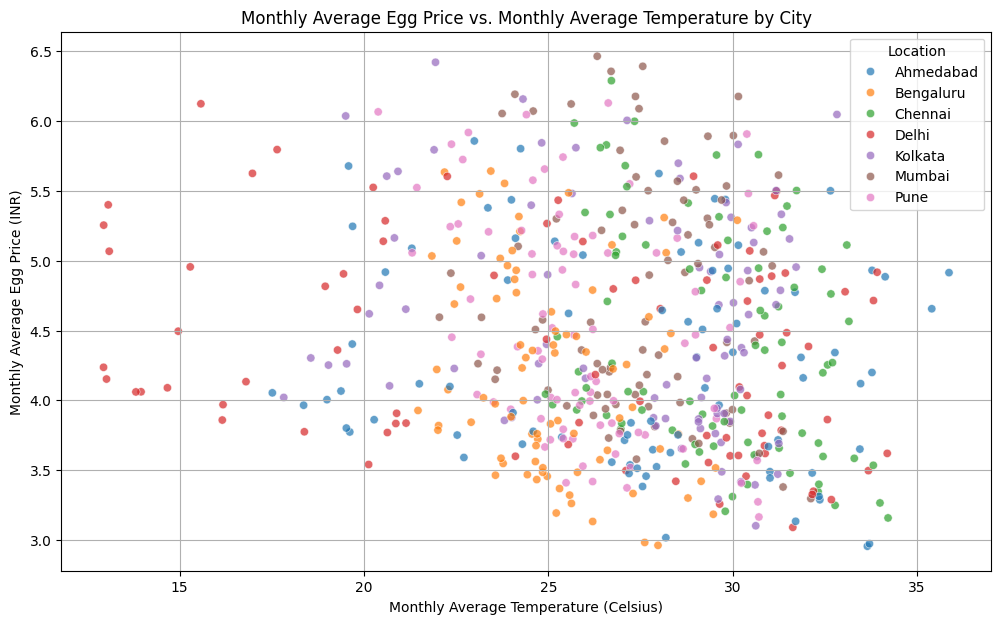

In [50]:
# Merge the two dataframes on Year, Month, and Location
merged_data = pd.merge(df_monthly_avg, monthly_avg_temp_combined,
                       on=['Year', 'Month', 'Location'],
                       how='inner')

print("Merged DataFrame head:")
display(merged_data.head())

# Calculate correlation between 'Average_Price_Per_Egg_INR_Monthly' and 'amonthly average temp' for each city
correlation_by_city = merged_data.groupby('Location')[['Average_Price_Per_Egg_INR_Monthly', 'amonthly average temp']].corr().unstack().iloc[:, 1]

print("\nCorrelation between Monthly Average Egg Price and Monthly Average Temperature by City:")
display(correlation_by_city)

# Visualize the correlation (optional, but good for context)
plt.figure(figsize=(12, 7))
sns.scatterplot(data=merged_data, x='amonthly average temp', y='Average_Price_Per_Egg_INR_Monthly', hue='Location', alpha=0.7)
plt.title('Monthly Average Egg Price vs. Monthly Average Temperature by City')
plt.xlabel('Monthly Average Temperature (Celsius)')
plt.ylabel('Monthly Average Egg Price (INR)')
plt.grid(True)
plt.show()

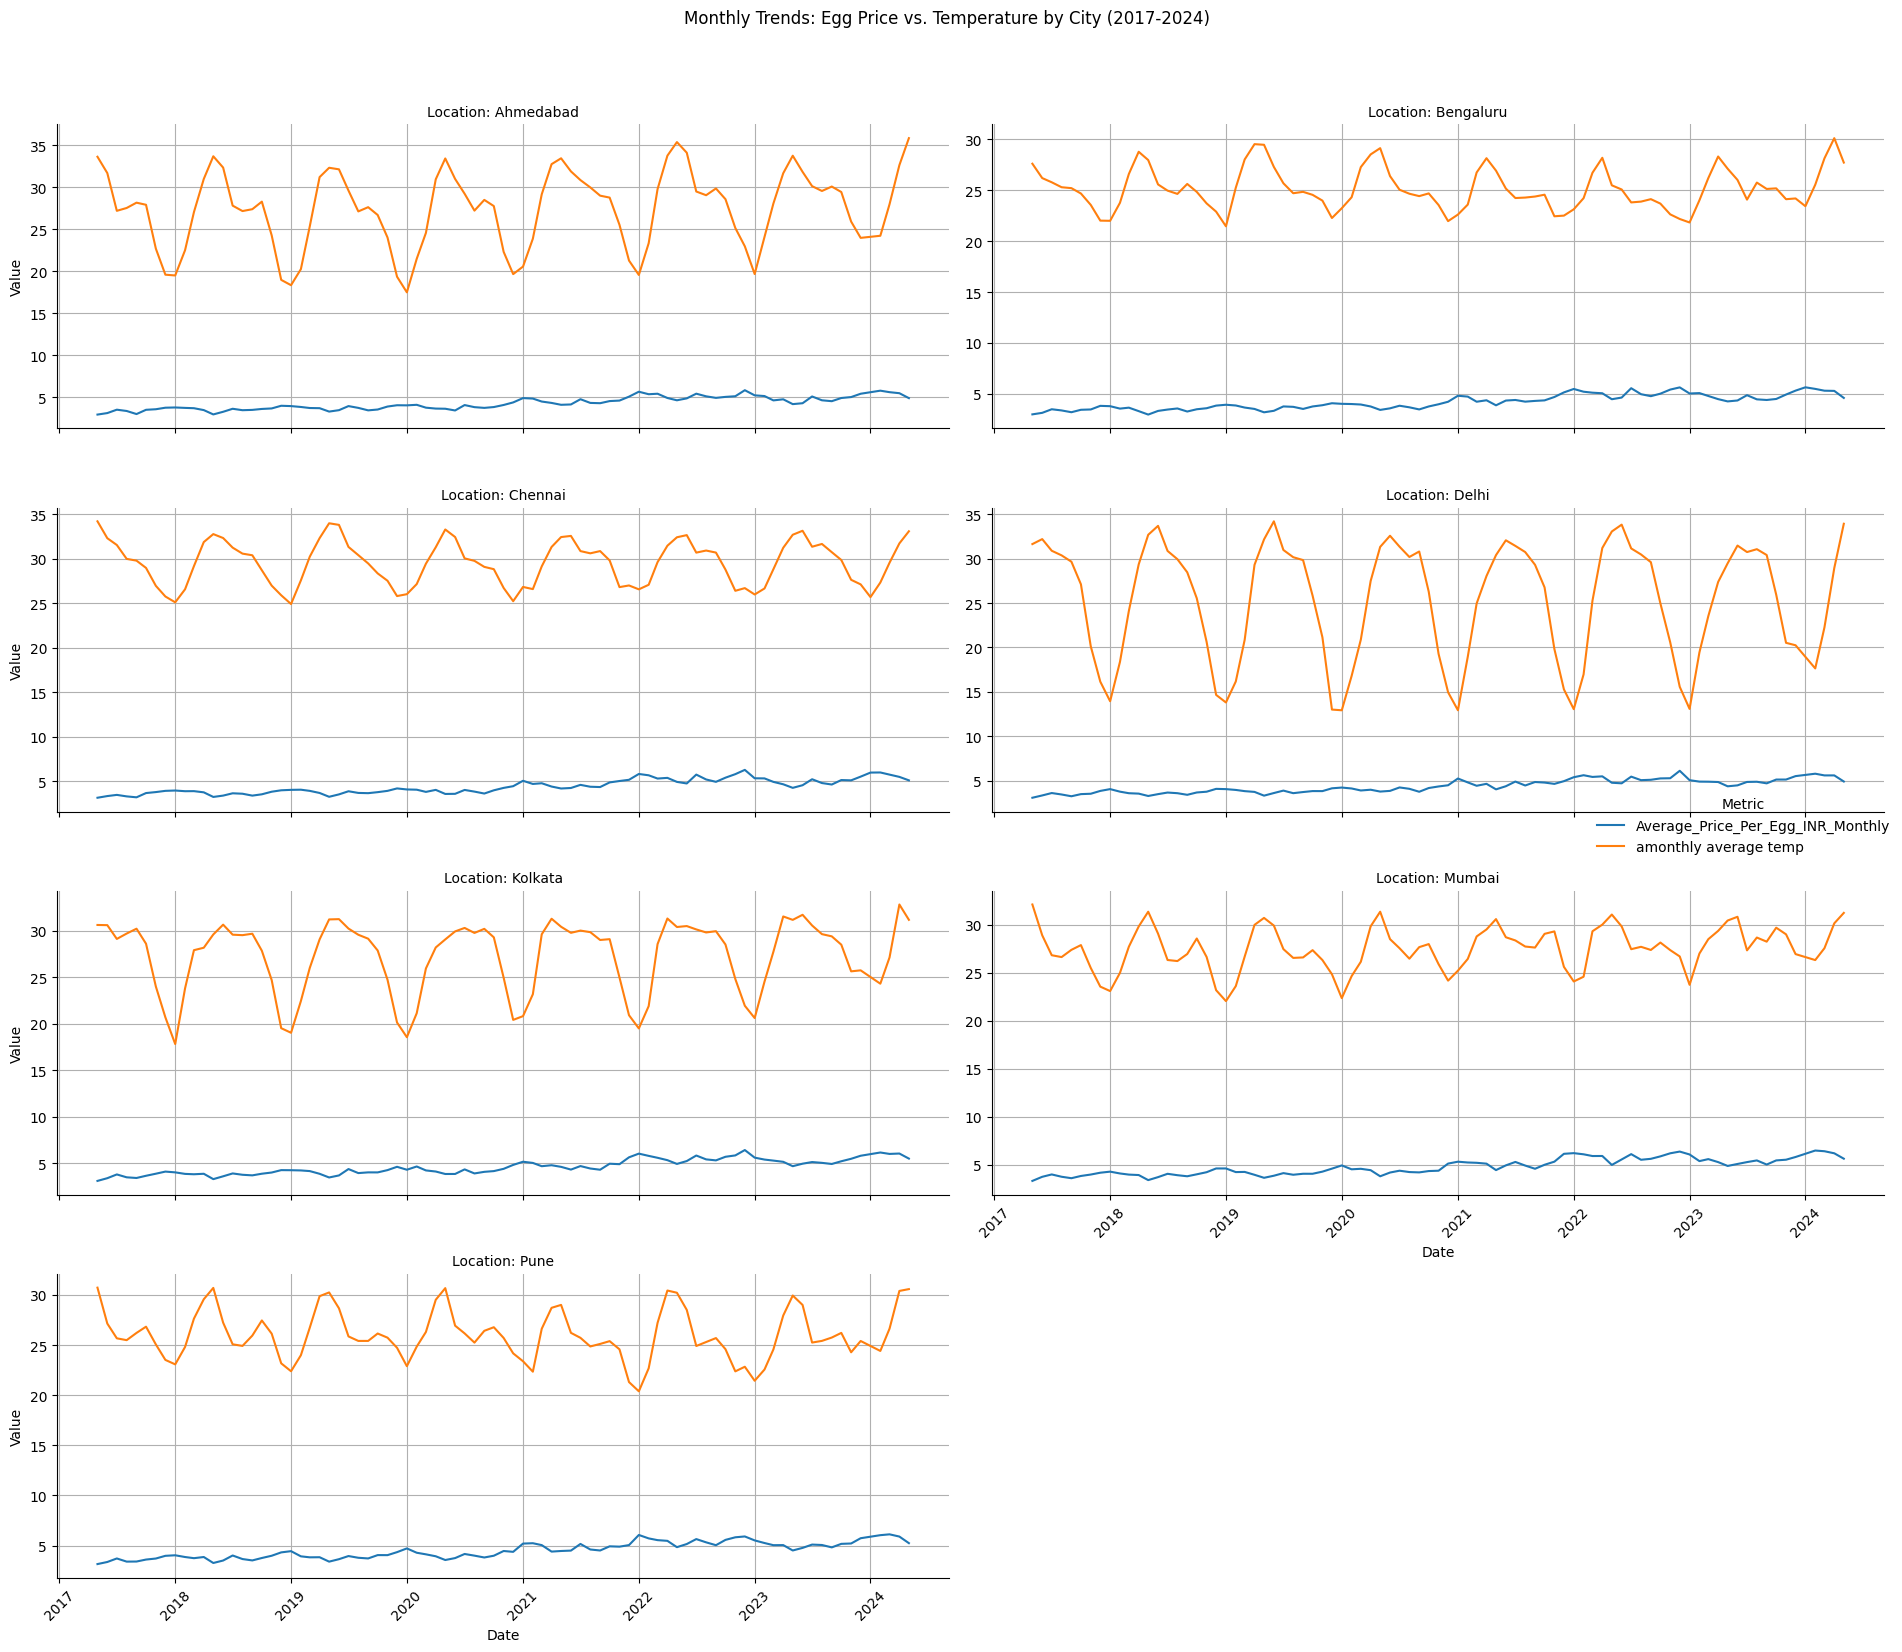

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting by melting it
# This stacks 'Average_Price_Per_Egg_INR_Monthly' and 'amonthly average temp' into a single column
merged_data_melted = merged_data.melt(id_vars=['Date_x', 'Year', 'Month', 'Location'],
                                      value_vars=['Average_Price_Per_Egg_INR_Monthly', 'amonthly average temp'],
                                      var_name='Metric', value_name='Value')

# Create a faceted line plot
g = sns.relplot(data=merged_data_melted,
                x='Date_x', y='Value',
                col='Location', hue='Metric',
                kind='line', col_wrap=2,
                height=4, aspect=2, facet_kws={'sharey':False})

# Set titles and labels for clarity
g.set_axis_labels("Date", "Value")
g.set_titles("Location: {col_name}")
g.fig.suptitle('Monthly Trends: Egg Price vs. Temperature by City (2017-2024)', y=1.03) # Adjust suptitle position

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [55]:
monthly_avg_temp_combined.to_csv('monthly_avg_temperature.csv', index=False)
print("DataFrame exported successfully to 'monthly_avg_temperature.csv'")

DataFrame exported successfully to 'monthly_avg_temperature.csv'


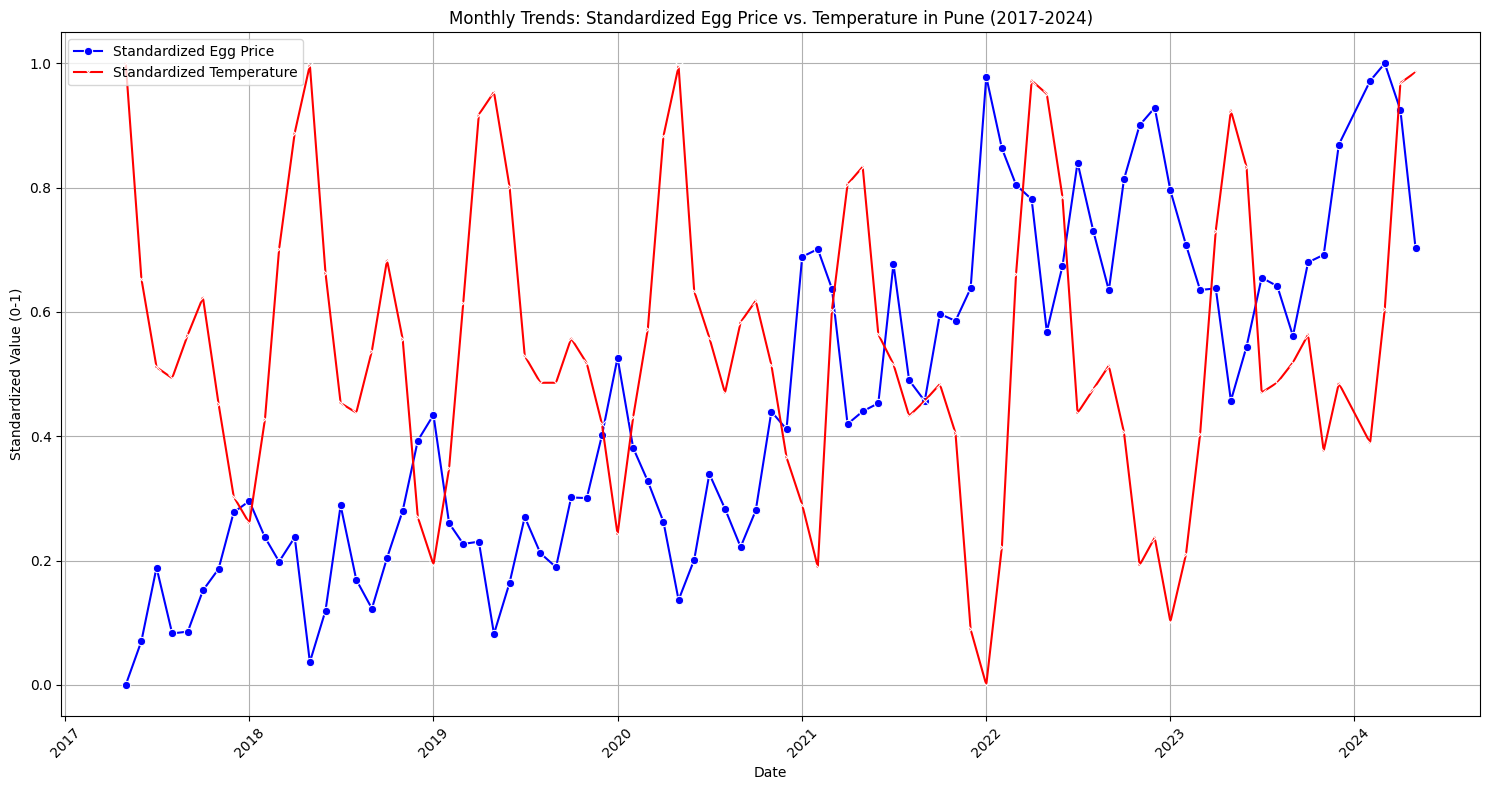

In [59]:
# Filter data for Pune only
pune_data = merged_data[merged_data['Location'] == 'Pune'].copy()

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Egg Price on the first Y-axis
sns.lineplot(data=pune_data, x='Date_x', y='Average_Price_Per_Egg_INR_Monthly', label='Egg Price (INR)', marker='o', color='blue', ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Price Per Egg (INR)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second Y-axis for Temperature
ax2 = ax1.twinx()
sns.lineplot(data=pune_data, x='Date_x', y='amonthly average temp', label='Average Temperature (Celsius)', marker='x', color='red', ax=ax2)
ax2.set_ylabel('Average Temperature (Celsius)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Monthly Trends: Egg Price vs. Temperature in Pune (2017-2024)')
plt.xticks(rotation=45)

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [61]:
# Filter data for Pune only (if not already done in the current session)
pune_data = merged_data[merged_data['Location'] == 'Pune'].copy()

print("Summary Statistics for Pune (Egg Price and Temperature):")
display(pune_data[['Average_Price_Per_Egg_INR_Monthly', 'amonthly average temp']].describe())

Summary Statistics for Pune (Egg Price and Temperature):


,Average_Price_Per_Egg_INR_Monthly,amonthly average temp
count,84.000000,84.000000
mean,4.516215,26.010835
std,0.790430,2.435558
min,3.164839,20.385000
25%,3.845024,24.687575
50%,4.430629,25.707302
75%,5.164645,27.214261
max,6.129355,30.715962
